In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
data=pd.read_csv("titanic_dataset.csv")

In [3]:
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


## 1. Understanding and handling the missing data

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
data.isnull().sum() #checking number of missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Handle missing values for numerical columns
num_col = data.select_dtypes(include=["number"]).columns
data[num_col] = data[num_col].fillna(data[num_col].mean())

In [7]:
# Handle missing values for categorical columns
cat_col = data.select_dtypes(include=["object"]).columns
for col in cat_col:
    data[col] = data[col].fillna(data[col].mode()[0])  # Replace missing values with the mode

In [8]:
# Check for remaining missing values
print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


There are no  more missing values in the dataset.

## 2. Converting categorical to numerical

Removing unnecessary columns from the dataset

In [10]:
data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

Converting the data 'Sex' and 'embarked' to numerical

In [12]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [13]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Cabin       891 non-null    object 
 8   Embarked_Q  891 non-null    bool   
 9   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(1)
memory usage: 57.6+ KB
None


Now all the categorical columns are converted to numerical.

## 3. Normalize or Standardize Numerical Data

In [19]:
scaler = MinMaxScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

## 4. Detect and Remove Outliers

<Axes: ylabel='Age'>

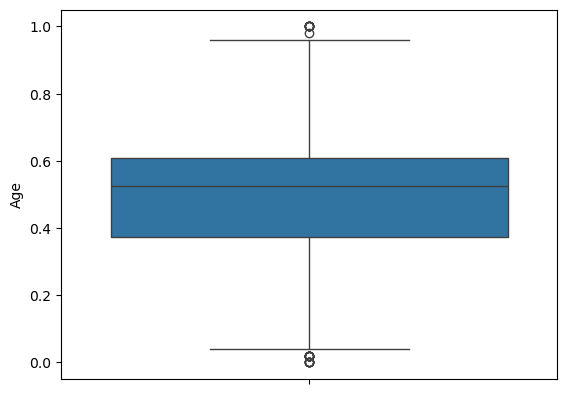

In [20]:
sns.boxplot(data['Age'])

In [21]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['Age'] < (Q1 - 1.5 * IQR)) | (data['Age'] > (Q3 + 1.5 * IQR)))]

## 5. FInal

In [23]:
# Save the cleaned data to a new file
data.to_csv('titanic_cl.csv', index=False)

In [24]:
# Sample preview
print("\nCleaned Data Sample:")
print(data.head())
print("\nCleaned data saved to 'titanic_cleaned.csv'")


Cleaned Data Sample:
   Survived  Pclass  Sex       Age  SibSp  Parch      Fare    Cabin  \
0         0       3    0  0.372549      1      0  0.014151  B96 B98   
1         1       1    1  0.686275      1      0  0.139136      C85   
2         1       3    1  0.450980      0      0  0.015469  B96 B98   
3         1       1    1  0.627451      1      0  0.103644     C123   
4         0       3    0  0.627451      0      0  0.015713  B96 B98   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  

Cleaned data saved to 'titanic_cleaned.csv'
